In [110]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipultion tool

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [111]:
data = pd.read_csv("https://raw.githubusercontent.com/Pallavi-Khabale/DPhi_Assg/main/Train_data.csv")

In [112]:
data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [113]:
data.columns

Index(['age', 'job_type', 'marital_status', 'education_level',
       'default_or_not', 'balance_amt', 'household_insurance', 'car_loan',
       'communication', 'last_contact_day', 'last_contact_month',
       'no_of_contacts', 'days_passed', 'prev_attempts', 'Outcome',
       'call_start', 'call_end', 'car_insurance'],
      dtype='object')

In [114]:
data.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance
count,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000
mean,41.325847,0.014507,1543.067240,0.465184,0.114442,15.353965,2.356867,52.419084,0.792392,0.567376
std,11.517698,0.119587,3301.474598,0.498867,0.318399,8.164255,2.594238,109.231364,2.224740,0.495520
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,123.821352,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,589.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,0.000000,1696.000000,1.000000,0.000000,21.000000,3.000000,56.750000,1.000000,1.000000
max,92.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


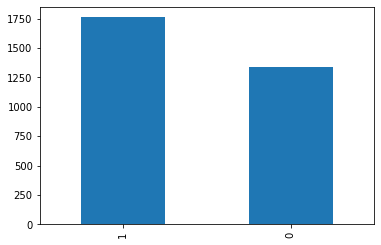

In [115]:
data.car_insurance.value_counts().plot(kind = 'bar')

In [116]:
data['job_type'] = pd.factorize(data.job_type)[0]
data['marital_status'] = pd.factorize(data.marital_status)[0]
data['education_level'] = pd.factorize(data.education_level)[0]
data['communication'] = pd.factorize(data.communication)[0]
data['last_contact_month'] = pd.factorize(data.last_contact_month)[0]
data['Outcome'] = pd.factorize(data.Outcome)[0]
data['call_start'] = pd.factorize(data.call_start)[0]
data['call_end'] = pd.factorize(data.call_end)[0]

In [117]:
# Input/independent variables
X = data.drop('car_insurance', axis = 1) # here we are droping the quality feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = data.car_insurance # Output/Dependent variable

In [118]:
# Let's check the shapes of X and y
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (3102, 17) Dimension:  2
Shape:  (3102,) Dimension:  1


In [119]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [120]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
log_model = LogisticRegression()

In [123]:
# Fit the model
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
predictions = log_model.predict(X_test)

In [125]:
y_test.values

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [126]:
predictions

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[216, 178],
       [131, 406]])

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
accuracy_score(y_test, predictions)

0.6680988184747583

In [151]:
output = pd.DataFrame(predictions)
output.columns = ["prediction"]
print(output)

     prediction
0             0
1             1
2             0
3             1
4             1
..          ...
926           1
927           1
928           0
929           1
930           0

[931 rows x 1 columns]


In [153]:
from google.colab import files
output.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**TEST FILE**

In [154]:
test_new = pd.read_csv("https://raw.githubusercontent.com/Pallavi-Khabale/DPhi_Assg/main/Test_data.csv" )


In [156]:
test_new.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [157]:
test_new.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,40.736173,0.008556,1679.624719,0.442781,0.127273,15.251337,2.484492,50.894118,0.785027
std,11.456842,0.092152,4273.492836,0.496981,0.333457,8.173175,3.011314,102.350034,1.961566
min,18.000000,0.000000,-999.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,0.000000,108.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000
50%,38.117035,0.000000,611.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000
75%,48.000000,0.000000,1823.400669,1.000000,0.000000,21.000000,3.000000,84.500000,1.000000
max,95.000000,1.000000,98417.000000,1.000000,1.000000,31.000000,41.000000,828.000000,31.000000


In [167]:
test_new['job_type'] = pd.factorize(test_new.job_type)[0]
test_new['marital_status'] = pd.factorize(test_new.marital_status)[0]
test_new['education_level'] = pd.factorize(test_new.education_level)[0]
test_new['communication'] = pd.factorize(test_new.communication)[0]
test_new['last_contact_month'] = pd.factorize(test_new.last_contact_month)[0]
test_new['Outcome'] = pd.factorize(test_new.Outcome)[0]
test_new['call_start'] = pd.factorize(test_new.call_start)[0]
test_new['call_end'] = pd.factorize(test_new.call_end)[0]

In [168]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  935 non-null    float64
 1   job_type             935 non-null    int64  
 2   marital_status       935 non-null    int64  
 3   education_level      935 non-null    int64  
 4   default_or_not       935 non-null    int64  
 5   balance_amt          935 non-null    float64
 6   household_insurance  935 non-null    int64  
 7   car_loan             935 non-null    int64  
 8   communication        935 non-null    int64  
 9   last_contact_day     935 non-null    int64  
 10  last_contact_month   935 non-null    int64  
 11  no_of_contacts       935 non-null    int64  
 12  days_passed          935 non-null    int64  
 13  prev_attempts        935 non-null    int64  
 14  Outcome              935 non-null    int64  
 15  call_start           935 non-null    int

In [169]:
target = log_model.predict(test_new)

In [170]:
target

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [202]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) 

In [204]:
res.columns = ["prediction"]

In [205]:
print(res.to_string(index=False))

 prediction
          1
          1
          1
          1
          0
          0
          1
          1
          1
          1
          1
          1
          0
          1
          1
          1
          0
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          0
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          0
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
    

In [206]:
# To download the csv file locally
from google.colab import files
res.to_csv('output.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>